In [1]:
# In this jupyter notebook, we will run some analysis for data in the manual inhibiton paradigm, collected online.
# We will first load the data from a json file and transform it into a pandas data frame. 
# Next, we will make sure to reformat that data frame such that every row is one trial (the json file will give us
# one row for every event)

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {}
# load data from different components:

# the experimental component
exp_data =  open('../data/Mar04')
# unpack the data
for ses, jf in enumerate(exp_data):
    
    # save it to a data frame
    jd = json.loads(jf)
    df = pd.DataFrame(jd)
#     try:
#         if df.test_part[0] == 'tutorial_welcome':
#             # is a tutorial block
#             elif df.test_part[0] == 'intro':
#                 # is a training block
#                 elif df.test_part[0] == 'welcome':
#                     # is an experiment block
#     except:
#         # is an outro block
#         pass
    df['session'] = ses

    try:
        data = pd.concat([data,df], axis = 0)
        #print('fail')
    except:
        data = df
data.reset_index(drop = True, inplace = True)
data

,success,test_part,scrWidth,scrHeight,userInfo,trial_type,trial_index,time_elapsed,internal_node_id,rt,...,js_touchdown,js_end,position,shift,inwards,flash,js_touchup,full_rt,response,session
0,True,welcome,780.0,360.0,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,fullscreen,0,2510,0.0-0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,preFixation,NaN,NaN,NaN,html-button-response-touchdown,1,3227,0.0-1.0-0.0,699.0,...,3225.0,3226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,fixation,NaN,NaN,NaN,html-button-response-touchdown,2,3431,0.0-1.0-1.0,NaN,...,3225.0,3431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,newPoint,NaN,NaN,NaN,html-button-response-touchdown,3,3586,0.0-1.0-2.0,NaN,...,3225.0,3585.0,l,0.0,NaN,1.0,NaN,NaN,NaN,0
4,NaN,flash,NaN,NaN,NaN,html-button-response-touchdown,4,3660,0.0-1.0-3.0,NaN,...,3225.0,3659.0,l,0.0,NaN,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,NaN,fixation,NaN,NaN,NaN,html-button-response-touchdown,356,143021,0.0-1.0-1.59,NaN,...,142792.0,143020.0,NaN,NaN,NaN,NaN,141089.0,NaN,NaN,6
2523,NaN,newPoint,NaN,NaN,NaN,html-button-response-touchdown,357,143150,0.0-1.0-2.59,NaN,...,142792.0,143150.0,l,1.0,1.0,0.0,141089.0,NaN,NaN,6
2524,NaN,flash,NaN,NaN,NaN,html-button-response-touchdown,358,143225,0.0-1.0-3.59,NaN,...,142792.0,143225.0,l,1.0,1.0,0.0,143158.0,NaN,NaN,6
2525,NaN,response,NaN,NaN,NaN,html-button-response-touchdown,359,143393,0.0-1.0-4.59,165.0,...,143392.0,143392.0,l,1.0,1.0,0.0,143158.0,370.0,True,6


In [4]:
np.linspace(-200,200,6)

array([-200., -120.,  -40.,   40.,  120.,  200.])

what these columns mean: 
1. 'success': 0/1 means if a response was given, 
2. 'test_part': preFixation, fixation, newPoint, flash, response, feedback are the different event during one trial
3. 'scrWidth, scrHeight' appear only in the beginning of the data file and have the information about screen size
4. 'trial_typ': which java script code was used for the event
5. 'trial_index': running number through all events
6. 'time_elapsed': time stamp at the end of the event
7. 'internal_node_id': idk
8. 'view_history': viewing time information for the instruction slides
9. 'rt': in button/keyboard press events, the time elapsed between event start and key/button press
10. 'stimulus': html for stimulus presentation
11. 'button_pressed': when there was more than one button: which one was pressed?
12. 'touchX': the X coordinate for down presses
13. 'touchY': the Y coordinate for Y presses
14. 'liftX': the X coordinate for fingers lifted from the screen
15. 'liftY': the Y coordniate for fingers lifted from the screen
16. 'js_start': time stamp beginning of the event
17. 'js_touchdown': time stamps of the response
18. 'js_touchup': time stamp of lift
19. 'js_end': time stamp of data writeout
20. 'key_press': there are no key presses in this experiment
21. 'position, shift, inwards, flash': information about the trial
22. 'full_rt': time from go signal (newPoint onset) till response onset
23. 'response': true/false if a response was given in time
24. 'session': id for the session

In [5]:
# collect meta data
mdf = pd.DataFrame(columns = ['WidthCSS', 'HeightCSS', 'WidthPix', 'HeightPix', 'Device', 'CenterX', 'CenterY'])

# the meta data is saved in different components. In the experimental component, 
# we saved meta information in the "welcome" part
# the welcome data frame
wdf = data[data.test_part == 'welcome']

for row,idx in enumerate(wdf.index):
    mdf.loc[row,'WidthCSS'] = wdf.scrWidth[idx]
    mdf.loc[row,'HeightCSS'] = wdf.scrHeight[idx]
    try:
        mdf.loc[row,'WidthPix'] = wdf['pixWidth'][idx]
        mdf.loc[row,'HeightPix'] = wdf['pixHeight'][idx]
    except:
        pass
    mdf.loc[row,'Device'] = wdf.userInfo[idx]
    mdf.loc[row,'CenterX'] = wdf.scrWidth[idx]/2
    mdf.loc[row,'CenterY'] = wdf.scrHeight[idx]/2

In [6]:
mdf

,WidthCSS,HeightCSS,WidthPix,HeightPix,Device,CenterX,CenterY
0,780,360,NaN,NaN,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,390,180
1,736,414,NaN,NaN,Mozilla/5.0 (Android 10; Mobile; rv:86.0) Geck...,368,207
2,375,667,NaN,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,187.5,333.5
3,1024,1366,NaN,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,512,683
4,1024,1366,NaN,NaN,NaN,512,683
5,1024,1366,NaN,NaN,NaN,512,683
6,1024,1366,NaN,NaN,NaN,512,683


In [7]:
# next, we want to group all values together that belong to one trial.
# we can do that by assigning one value between the first event "prefixation" and the last event "feedback"
nr = 0
for start,end in zip(np.where(data.test_part == 'preFixation')[0],np.where(data.test_part == 'feedback')[0]):
    
    data.loc[start:end, 'trial_nr'] = nr
    nr +=1


In [8]:
# clean all trials with invalid responses
inval_count = 0
for trial in np.unique(data.trial_nr):
    
    trial_data = data[data.trial_nr == trial]
    
    if not trial_data[trial_data.test_part == 'response'].response.values:
        inval_count+=1
        drop_idx = trial_data.index
        data.drop(drop_idx, inplace = True)
        
print('There were {} invalid trials in total'.format(inval_count))

There were 42 invalid trials in total


C:\Users\ClaraQ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


In [9]:
# initialize the summary data frame
sdf = pd.DataFrame(columns = ['trial', 't_sync', 't_fixOn', 't_fixTouched', 't_fixOff', 't_waitOn', 't_waitOff', 't_jumpOn', 't_liftOn', 't_jumpOff', 't_flashOn', 't_flashOff', 't_respOn' , 't_touchOn', 't_respOff', 'position', 'shift', 'inwards', 'flash', 'touchX', 'touchY', 'liftX', 'liftY', 'session', 'response'])

In [10]:
# parse data into summary data frame
# get all trial numbers
for trial in np.unique(data.trial_nr):
    
    # check if the trial number is nan 
    if not np.isnan(trial):
        # set a value for the rows of the summary df (sdf), matched with the trial number
        row = int(trial)
        # get the trial data only
        tdf = data[data.trial_nr == trial]
        # get the time when the experiment started as synchronization time
        t_sync = tdf[tdf.test_part == 'preFixation'].js_start.values[0]
        # retrieve information about the experiment
        # the trial number
        sdf.loc[row,'trial'] = trial 
        # sync time
        sdf.loc[row,'t_sync'] = t_sync
        
        # pre Fixation timestamps:
        preFix = tdf[tdf.test_part == 'preFixation']
        # fixation timestamps:
        fix = tdf[tdf.test_part == 'fixation']
        # new point timestamps:
        newPoint = tdf[tdf.test_part == 'newPoint']
        # flash timestamps:
        flash = tdf[tdf.test_part == 'flash']
        # response waiting timestamps
        resp = tdf[tdf.test_part == 'response']
        # feedback time
        feed = tdf[tdf.test_part == 'feedback']
        
        # time when the fixation point came on (should be 0)
        sdf.loc[row,'t_fixOn'] = preFix.js_start.values[0] - t_sync
        # time the fixation point was touched 
        sdf.loc[row,'t_fixTouched'] = preFix.js_touchdown.values[0] - t_sync
        # time the grey fixation point turned off
        sdf.loc[row,'t_fixOff'] = preFix.js_end.values[0] - t_sync
        # time the black fixation point turned on
        sdf.loc[row,'t_waitOn'] = fix.js_start.values[0] - t_sync
        # time the black fixation point turned off
        sdf.loc[row,'t_waitOff'] = fix.js_end.values[0] - t_sync
        
        # create a value to control for lifts
        control_lift = preFix.js_touchup.values[0]
        
        # time the point jumped
        sdf.loc[row,'t_jumpOn'] = newPoint.js_start.values[0] - t_sync
        
        # time when the finger was lifted
        # make sure that the lift time point was not the same as registered at the beginning 
        # of the experiment (because then it would be an older one)
        if not newPoint.js_touchup.values[0] == control_lift:
            lift = newPoint
        elif not flash.js_touchup.values[0] == control_lift: 
            lift = flash
        else:
            lift = resp
            
        sdf.loc[row,'t_liftOn'] = lift.js_touchup.values[0] - t_sync
        
        # time the newPoint event was terminated
        sdf.loc[row,'t_jumpOff'] = newPoint.js_end.values[0] - t_sync
        # time the flash appeared on the screen
        sdf.loc[row,'t_flashOn'] = flash.js_start.values[0] - t_sync
        # time the flash disappeared again
        sdf.loc[row,'t_flashOff'] = flash.js_end.values[0] - t_sync
        # time the response dot just waited for touch
        sdf.loc[row,'t_respOn'] = resp.js_start.values[0] - t_sync
        # time the touch response was registered
        sdf.loc[row,'t_touchOn'] = resp.js_touchdown.values[0] - t_sync
        # time the response dot was turned off
        sdf.loc[row,'t_respOff'] = resp.js_end.values[0] - t_sync
        # time the feedback was presented
        # time the trial ended
        
        # the x coordinates where the screen was released (should always be the center)
        sdf.loc[row,'liftX'] = lift.liftX.values[0]
        # the y coordinates where the screen was released (should always be the center)
        sdf.loc[row,'liftY'] = lift.liftY.values[0]
        # the x coordinates where the screen was touched
        sdf.loc[row,'touchX'] = resp.touchX.values[0]
        # the y coordinates where the screen was touched
        sdf.loc[row,'touchY'] = resp.touchY.values[0]

        # position of the jumped stimulus (left or right)
        sdf.loc[row,'position'] = resp.position.values[0]
        # if there was a shift or not (0/1)
        sdf.loc[row,'shift'] = resp['shift'].values[0]
        # if the shift was inwards or not (0/1/nan)
        sdf.loc[row,'inwards'] = resp.inwards.values[0]
        # if there was a visible flash or not
        sdf.loc[row,'flash'] = resp.flash.values[0]
        # the subject number
        sdf.loc[row,'session'] = resp.session.values[0]
        # if a response was given or not (will be false when answer was too slow)
        sdf.loc[row,'response'] = feed.stimulus.values[0] == '<p>Well Done.</p>'
    

In [11]:
sdf

,trial,t_sync,t_fixOn,t_fixTouched,t_fixOff,t_waitOn,t_waitOff,t_jumpOn,t_liftOn,t_jumpOff,...,position,shift,inwards,flash,touchX,touchY,liftX,liftY,session,response
0,0,2526,0,699,700,704,905,908,NaN,1059,...,l,0,NaN,1,209.5,192.5,NaN,NaN,0,True
1,1,5444,0,459,459,461,561,562,921,763,...,r,1,1,1,523.5,175.5,365.5,192.5,0,True
3,3,11564,0,575,575,576,827,829,1168,979,...,r,1,0,1,501.5,170.5,364.5,189.5,0,True
4,4,14320,0,504,504,505,606,609,977,709,...,r,0,NaN,1,548,173,354.5,198.5,0,True
5,5,16871,0,473,473,475,626,629,1042,729,...,l,1,1,1,248,182,352.5,196,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,130672,0,335,335,337,563,564,687,716,...,l,1,0,0,575,486,691,493,6,True
416,416,135730,0,295,295,297,398,401,610,553,...,r,1,0,0,847,488,694,492,6,True
417,417,137999,0,209,209,211,463,466,520,592,...,l,1,0,1,572,486,700,490,6,True
418,418,140232,0,295,295,298,499,501,640,602,...,r,1,0,1,841,476,690,493,6,True


C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


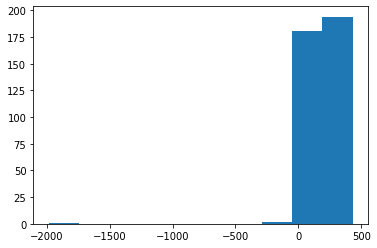

In [12]:
plt.hist(sdf.t_liftOn - sdf.t_jumpOn);

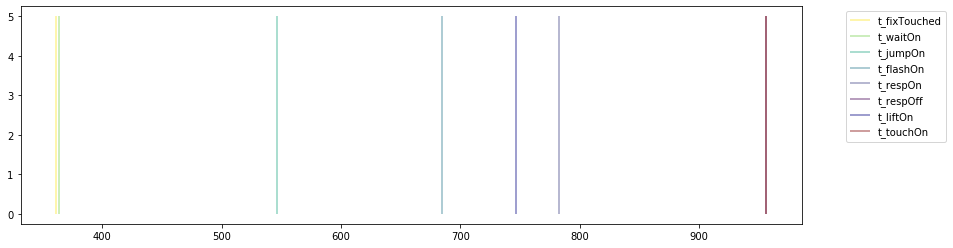

In [13]:
# make a timeline
# columns we want to plot:
t_times = ['t_fixTouched', 't_waitOn', 't_jumpOn', 't_flashOn', 't_respOn', 't_respOff']
t_actions = ['t_liftOn', 't_touchOn'] 

# define a colormap
t_cm = plt.cm.viridis_r(np.linspace(0,1,len(t_times)))


time_fig, time_ax = plt.subplots(1,1, figsize = (14,4))

for tim, c in zip(t_times, t_cm):
    
    mean_val = np.mean(sdf[tim])
    #print(mean_val)
    time_ax.vlines(mean_val, 0, 5, color = c, label = tim, alpha = 0.5)

a_cm = plt.cm.jet(np.linspace(0,1,len(t_actions)))

for ac, c in zip(t_actions, a_cm):
    
    mean_val = np.mean(sdf[ac])
    #print(mean_val)
    time_ax.vlines(mean_val, 0, 5, color = c, label = ac, alpha = 0.5)
        
        
time_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');


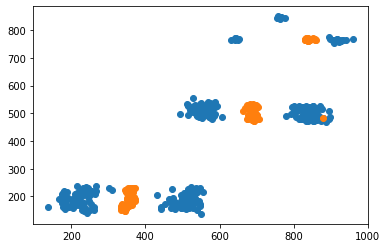

In [14]:
# plot the x and y touches and lifts

plt.scatter(sdf.touchX, sdf.touchY, label = 'touch')
plt.scatter(sdf.liftX, sdf.liftY, label = 'lift')

In [15]:
# collect meta data
# center the x/y coordinates relative to the screen center

sdf['normLiftX'] = np.nan
sdf['normLiftY'] = np.nan
sdf['normTouchX'] = np.nan
sdf['normTouchY'] = np.nan

for session in np.unique(sdf.session):
    
    sessions = sdf.session == session
    
    meanX = np.mean(sdf[sdf.session == session]['liftX'])
    meanY = np.mean(sdf[sdf.session == session]['liftY'])
    
    
    sdf.loc[sessions, 'normLiftX'] = sdf[sessions]['liftX']-meanX
    sdf.loc[sessions, 'normLiftY'] = sdf[sessions]['liftY']-meanY
    
    sdf.loc[sessions, 'normTouchX'] = sdf[sessions]['touchX'] - meanX
    sdf.loc[sessions, 'normTouchY'] = sdf[sessions]['touchY'] - meanY

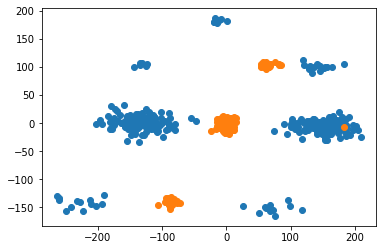

In [16]:
plt.scatter(sdf.normTouchX, sdf.normTouchY)
plt.scatter(sdf.normLiftX, sdf.normLiftY)

In [17]:
# clean xy coordinate that are not centered around 0

sdf.drop(sdf[abs(sdf.normLiftX)>50].index, inplace = True)
sdf.drop(sdf[abs(sdf.normTouchY)>100].index, inplace = True)

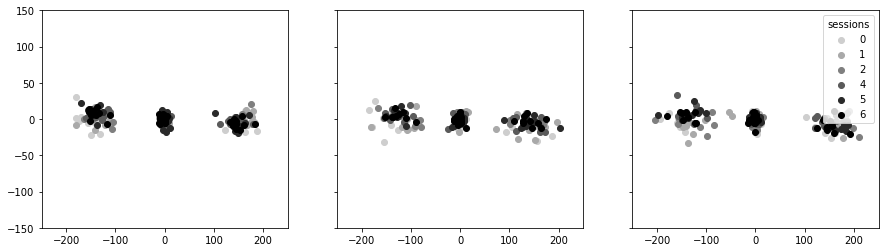

In [18]:
fig_touches, ax_touches = plt.subplots(1,3, figsize = (15,4), sharex = True, sharey =True)
cmap = plt.cm.Greys(np.linspace(0.3,1, len(np.unique(sdf.session))))

for ses, c in zip(np.unique(sdf.session), cmap):
    
    s_sdf = sdf[sdf.session == ses]
    ax_touches[0].scatter(s_sdf[s_sdf['shift']==0].normLiftX, s_sdf[s_sdf['shift']==0].normLiftY, color = c, label = ses)
    ax_touches[0].scatter(s_sdf[s_sdf['shift']==0].normTouchX, s_sdf[s_sdf['shift']==0].normTouchY, color = c)
    
    ax_touches[1].scatter(s_sdf[s_sdf.inwards==1].normLiftX, s_sdf[s_sdf.inwards==1].normLiftY, color = c, label = ses)
    ax_touches[1].scatter(s_sdf[s_sdf.inwards==1].normTouchX, s_sdf[s_sdf.inwards==1].normTouchY, color = c)
    
    ax_touches[2].scatter(s_sdf[s_sdf.inwards==0].normLiftX, s_sdf[s_sdf.inwards==0].normLiftY, color = c, label = ses)
    ax_touches[2].scatter(s_sdf[s_sdf.inwards==0].normTouchX, s_sdf[s_sdf.inwards==0].normTouchY, color = c)
    

    
ax_touches[0].set_xlim(-250, 250)
ax_touches[0].set_ylim(-150, 150)
ax_touches[2].legend(title='sessions');

In [19]:
# Get an understanding of the differences between outward and inward shifts
print('The mean shift point touched with no shift was: {}'.format(np.mean(abs(sdf[sdf['shift']== 0].normTouchX))))

print('The mean shift point touched with inward shift was: {}'.format(np.mean(abs(sdf[sdf.inwards== 1].normTouchX))))

print('The mean shift point touched with outward shift was: {}'.format(np.mean(abs(sdf[sdf.inwards== 0].normTouchX))))


The mean shift point touched with no shift was: 145.92538451930344
The mean shift point touched with inward shift was: 134.23657429359184
The mean shift point touched with outward shift was: 146.55667156310082


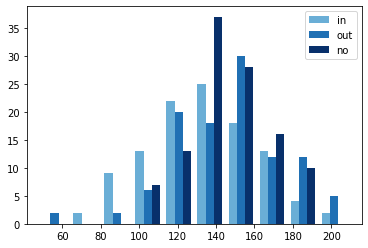

In [20]:
plt.hist([abs(sdf[sdf.inwards== 1].normTouchX), abs(sdf[sdf.inwards== 0].normTouchX), abs(sdf[sdf['shift']== 0].normTouchX)], color = plt.cm.Blues(np.linspace(0.5,1,3)), label = ['in', 'out', 'no'])
plt.legend();

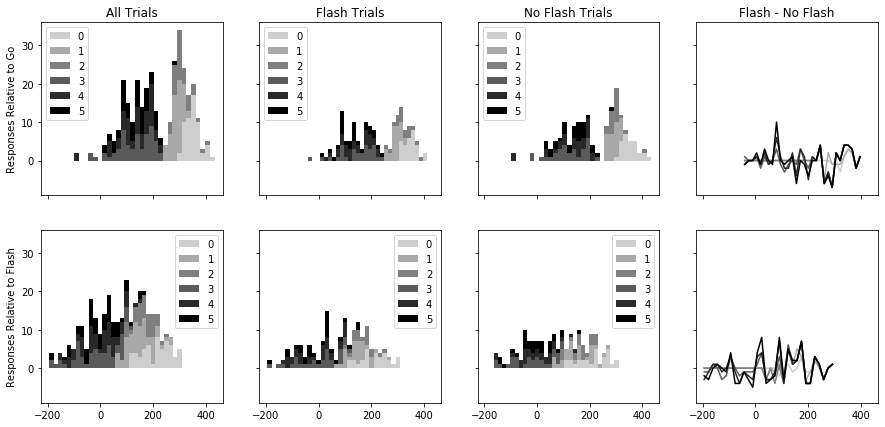

In [21]:
# reaction time distributions
fig_rt_all, ax_rt_all = plt.subplots(2,4, figsize = (15,7), sharex= True, sharey = True)

cmap = plt.cm.Greys(np.linspace(0.3,1, len(np.unique(sdf.session))))
x_all = []
x_flash = []
x_noflash = []

x_all_rel = []
x_flash_rel = []
x_noflash_rel = []

for ses, c in zip(np.unique(sdf.session), cmap):
    s_sdf = sdf[sdf.session == ses]
    x_all.append(s_sdf.t_liftOn - s_sdf.t_jumpOn)
    x_flash.append(s_sdf[s_sdf.flash == 1].t_liftOn - s_sdf[s_sdf.flash == 1].t_jumpOn)
    x_noflash.append(s_sdf[s_sdf.flash == 0].t_liftOn - s_sdf[s_sdf.flash == 0].t_jumpOn)
    
    
    x_all_rel.append(s_sdf.t_liftOn - s_sdf.t_flashOn)
    x_flash_rel.append(s_sdf[s_sdf.flash == 1].t_liftOn - s_sdf[s_sdf.flash == 1].t_flashOn)
    x_noflash_rel.append(s_sdf[s_sdf.flash == 0].t_liftOn - s_sdf[s_sdf.flash == 0].t_flashOn)

ax_rt_all[0,0].hist(x_all,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[0,0].legend()
ax_rt_all[0,0].set_title('All Trials')
ax_rt_all[0,0].set_ylabel('Responses Relative to Go')

h_f_go = ax_rt_all[0,1].hist(x_flash,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[0,1].legend()
ax_rt_all[0,1].set_title('Flash Trials')

h_nf_go = ax_rt_all[0,2].hist(x_noflash,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[0,2].legend()
ax_rt_all[0,2].set_title('No Flash Trials')
    
ax_rt_all[1,0].hist(x_all_rel,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[1,0].legend()
ax_rt_all[1,0].set_ylabel('Responses Relative to Flash')

h_f_f = ax_rt_all[1,1].hist(x_flash_rel,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[1,1].legend()

h_nf_f =ax_rt_all[1,2].hist(x_noflash_rel,30, label = [0,1,2,3,4,5,6], color = cmap, stacked = True);
ax_rt_all[1,2].legend();


#difference between flash and no flash histograms:
x_diff = []
x_diff_rel = []
for go_arr1, go_arr2, f_arr1, f_arr2 in zip(h_f_go[0],h_nf_go[0],h_f_f[0],h_nf_f[0]):
    
    x_diff.append(go_arr1 - go_arr2)
    x_diff_rel.append(f_arr1 - f_arr2)

for diff, diff_rel, c in zip(x_diff, x_diff_rel, cmap):
    ax_rt_all[0,3].plot(h_f_go[1][:30],diff, color =c);
    ax_rt_all[1,3].plot(h_f_f[1][:30],diff_rel, color =c);

ax_rt_all[0,3].set_title('Flash - No Flash');

